# JSON Exercise: Lauren Broussard 

****
## Instructions

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated in the *sliderule_dsi_json_exercise notebook*: 

1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.
****


In [1]:
#import necessary libraries & modules

import pandas as pd

import json
from pandas.io.json import json_normalize

import matplotlib.pyplot as plt
import numpy as np

In [2]:
#load json file as dataframe 
world_bank = pd.read_json('data/world_bank_projects.json')

In [3]:
#view column names
print(world_bank.columns)

Index(['sector', 'supplementprojectflg', 'projectfinancialtype', 'prodline',
       'mjtheme', 'idacommamt', 'impagency', 'project_name', 'mjthemecode',
       'closingdate', 'totalcommamt', 'id', 'mjsector_namecode', 'docty',
       'sector1', 'lendinginstr', 'countrycode', 'sector2', 'totalamt',
       'mjtheme_namecode', 'boardapprovaldate', 'countryshortname', 'sector4',
       'prodlinetext', 'productlinetype', 'regionname', 'status',
       'country_namecode', 'envassesmentcategorycode', 'project_abstract',
       'approvalfy', 'projectdocs', 'lendprojectcost', 'lendinginstrtype',
       'theme1', 'grantamt', 'themecode', 'borrower', 'sectorcode', 'sector3',
       'majorsector_percent', 'board_approval_month', 'theme_namecode',
       'countryname', 'url', 'source', 'projectstatusdisplay', 'ibrdcommamt',
       'sector_namecode', '_id'],
      dtype='object')


## 1) Find the 10 countries with the most projects

In [4]:
#select 'countryname' column and get counts of top 10 countries
projects_top10 = world_bank['countryname'].value_counts()[:10]
projects_top10

Republic of Indonesia              19
People's Republic of China         19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
Nepal                              12
People's Republic of Bangladesh    12
Kingdom of Morocco                 12
Republic of Mozambique             11
Africa                             11
Name: countryname, dtype: int64

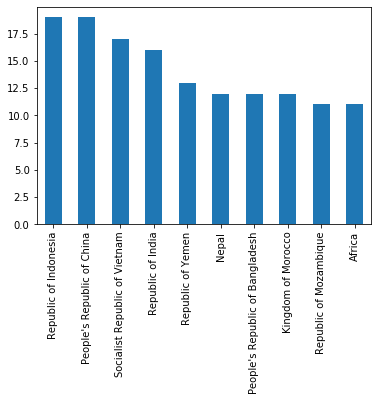

In [5]:
#display bar graph of top 10 countries
projects_top10.plot(kind='bar')
plt.show()

## 2) Find the top 10 major project themes (using column 'mjtheme_namecode')

In [6]:
#load json data again as list
data = json.load((open('data/world_bank_projects.json')))

In [7]:
#normalize 'mjtheme_namecode' column and display dataframe
project_themes= json_normalize(data,'mjtheme_namecode')
project_themes

,code,name
0,8,Human development
1,11,
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration
...,...,...
1494,10,Rural development
1495,9,Urban development
1496,8,Human development
1497,5,Trade and integration


In [8]:
#select 'names' column to display top 10 themes
themes_top10 = project_themes['name'].value_counts()[:10]
themes_top10

Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
                                                122
Social dev/gender/inclusion                     119
Trade and integration                            72
Urban development                                47
Name: name, dtype: int64

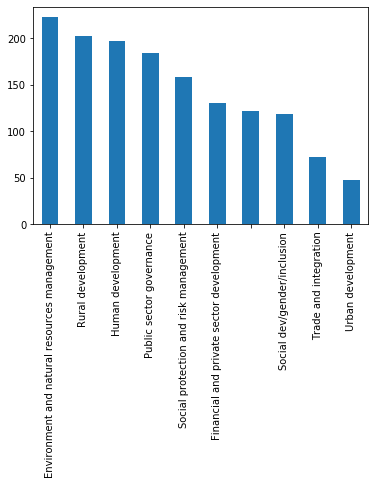

In [9]:
#display bar graph of top 10 themes
themes_top10.plot(kind='bar')
plt.show()

## 3) In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [10]:
#find rows with missing 'name' values and replace with NaN
missing_theme = project_themes[project_themes['name'] == '']
project_themes = project_themes.replace('',np.nan)

In [11]:
#Method 1: create dataframe with missing 'name' column filled with 'THEME MISSING': project_themes1
project_themes1 = project_themes.copy()
project_themes1['name'] = project_themes1['name'].replace(np.nan,'MISSING THEME')
project_themes1

,code,name
0,8,Human development
1,11,MISSING THEME
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration
...,...,...
1494,10,Rural development
1495,9,Urban development
1496,8,Human development
1497,5,Trade and integration


In [12]:
#Method2: create dataframe with missing 'name' forward filled: project_themes2

#sort dataframe by 'code' -ascending- and 'name' -descending
project_themes2 = project_themes.sort_values(by=['code','name'], ascending=[True,False])

#forward fill missing value
project_themes2 = project_themes2.ffill()

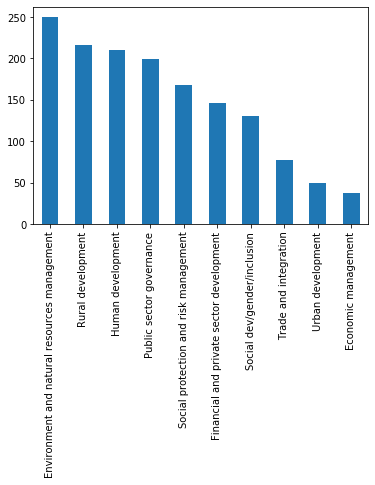

In [13]:
#get new top 10 of themes
themes_top10_new = project_themes2.name.value_counts()[:10]

#display new 10 top
themes_top10_new.plot(kind='bar')
plt.show()